In [14]:
import pandas as pd
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import torch.nn as nn
from sklearn.model_selection import train_test_split
global onehotencoder_y


def fileReading(file_name):
    dataset = pd.read_table(file_name)
   
    y = dataset.iloc[:,-3].values


  


    #debug
    print("UNIQUE LABELS/CLASSES : ",np.unique(y))

    # one hot encode the out labels - required for training the NN.
    onehotencoder_y = OneHotEncoder(sparse=False)
    print(onehotencoder_y)
    y=y.reshape(-1, 1) # reshape required for correct one hot encoding fit_transform()
    
    #print(onehotencoder_y.categories)
    y = onehotencoder_y.fit_transform(y)
    print(y)
    
     

    return y

UNIQUE LABELS/CLASSES :  ['bot' 'clothes' 'plastic' 'steel']
OneHotEncoder(sparse=False)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
UNIQUE LABELS/CLASSES :  ['bot' 'clothes' 'plastic' 'steel']
OneHotEncoder(sparse=False)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
UNIQUE LABELS/CLASSES :  ['bot' 'clothes' 'plastic' 'steel']
OneHotEncoder(sparse=False)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[869. 870. 884. 954.]
[ 966.  910. 1142.  966.]
[ 941.  918. 1094.  982.]


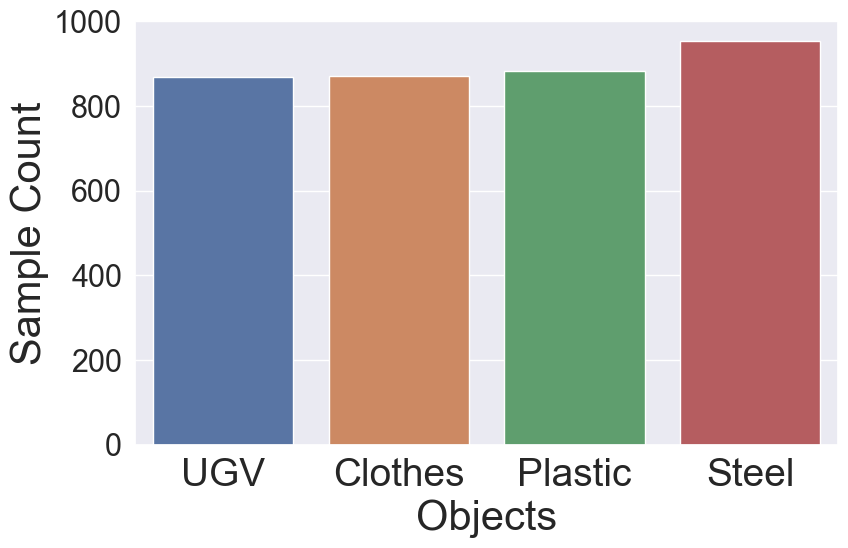

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

y_sunnyData70 = fileReading("sunny_7_.txt") 
y_darkData70 = fileReading("night_7_.txt")
y_lablightData70 = fileReading("lablight_7_.txt")

sunny_data_label_count = np.sum(y_sunnyData70,axis=0)
lablight_data_label_count = np.sum(y_lablightData70,axis=0)
dark_data_label_count = np.sum(y_darkData70,axis=0)

print(sunny_data_label_count)
print(lablight_data_label_count)
print(dark_data_label_count)


def dataDistribution(data_label_count,name):

  sns.set(rc={'figure.figsize':(9,6)}, font_scale = 2)
  # sns.set()
  ax = sns.barplot(x=['UGV', 'Clothes', 'Plastic', 'Steel'],y=data_label_count)
  # ax.set(xlabel='activity', ylabel='count')

  plt.xlabel('Objects', fontsize=30);
  plt.ylabel('Sample Count', fontsize=30);

  for item in ax.get_xticklabels():
      item.set_rotation(0)
      item.set_fontsize(28)

  plt.tight_layout()
  plt.savefig(name+'.PNG', bbox_inches = "tight")
  del data_label_count,name

dataDistribution(sunny_data_label_count,"sunny_data_7")
#dataDistribution(lablight_data_label_count,"lablight_data_7")
#dataDistribution(dark_data_label_count,"dark_data_7")